In [1]:
install.packages("datasets")
install.packages("dplyr")
install.packages("magrittr")
install.packages("ggplot2")
install.packages("tidyverse")
install.packages("rio")
install.packages("ggfortify")
install.packages("forecast")
install.packages("nnfor")

library(nnfor)
library(magrittr)
library(ggplot2)
library(tidyverse)
library(rio)
library(ggfortify)
library(forecast)
library(datasets)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’, ‘writexl’, ‘R.utils’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’,

In [2]:
df<-AirPassengers

In [3]:
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


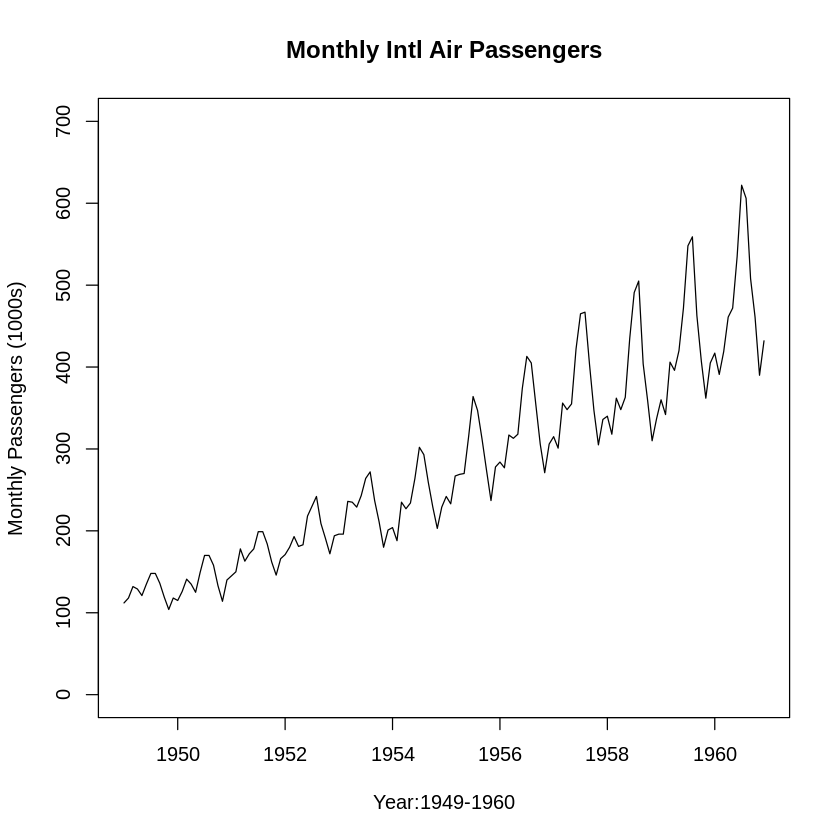

In [5]:
df%>%plot(main="Monthly Intl Air Passengers",xlab="Year:1949-1960",ylab="Monthly Passengers (1000s)",
ylim=c(0,700))

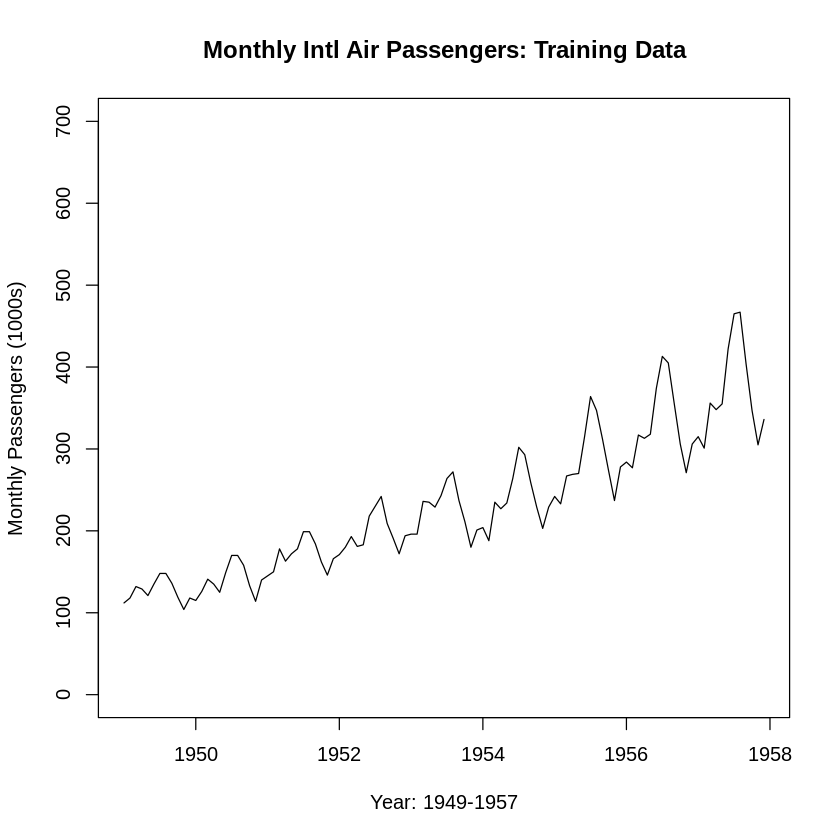

In [7]:
train<-df%>%window(end=c(1957,12))
train%>%plot(main="Monthly Intl Air Passengers: Training Data",xlab="Year: 1949-1957",
ylab="Monthly Passengers (1000s)",ylim=c(0,700))


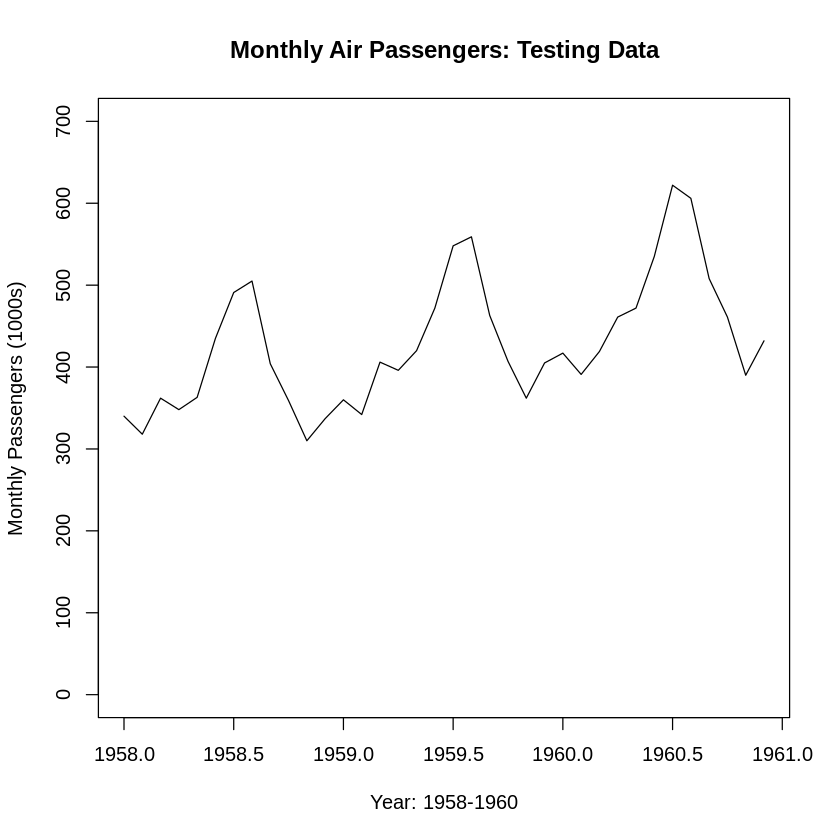

In [8]:
test<-df%>%window(start=1958)
test%>%plot(main="Monthly Air Passengers: Testing Data",
xlab="Year: 1958-1960",
ylab="Monthly Passengers (1000s)",ylim=c(0,700))

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1958 348.2610 330.3664 392.6679 383.9424 386.8571 457.6242 512.7218 511.1807
1959 395.3877 378.1677 451.5691 446.7940 446.7554 505.8669 558.1327 565.4288
1960 436.2058 424.0057 489.3064 489.0136 485.7867 552.7748 597.5886 608.8063
          Sep      Oct      Nov      Dec
1958 442.3118 397.4960 350.7021 382.1402
1959 490.6375 431.2656 396.2522 417.4541
1960 546.4879 500.2092 449.7090 484.7477

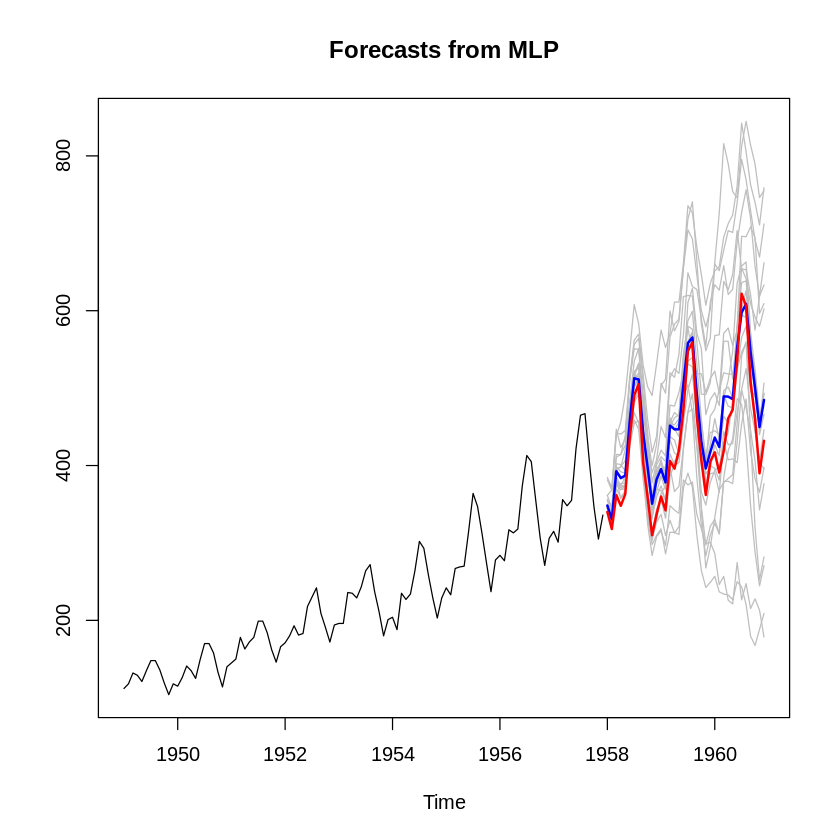

In [9]:
# Fit default MLP model; number of hidden nodes = 5 (can add
# the argument hd.auto.type = "set") (takes a few seconds)
fit1  <- train  %>% mlp()
pred1 <- fit1 %>% forecast(h = 36)
pred1                                  # Show predictions
pred1 %>% plot()                       # Plot predictions
test   %>% lines(lwd = 2, col = "red")  # Plot testing data

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1958 349.8732 334.5235 401.6966 392.2591 392.7172 464.4067 516.1811 519.2879
1959 371.8583 350.2603 420.3404 414.5887 430.8377 516.2225 563.3982 551.2711
1960 410.7662 379.8123 461.1631 431.9287 441.4855 509.2901 579.2135 583.6387
          Sep      Oct      Nov      Dec
1958 448.3188 387.6381 336.7982 358.0322
1959 487.7142 436.4745 383.5289 407.6948
1960 501.6601 462.9311 392.9186 422.9258

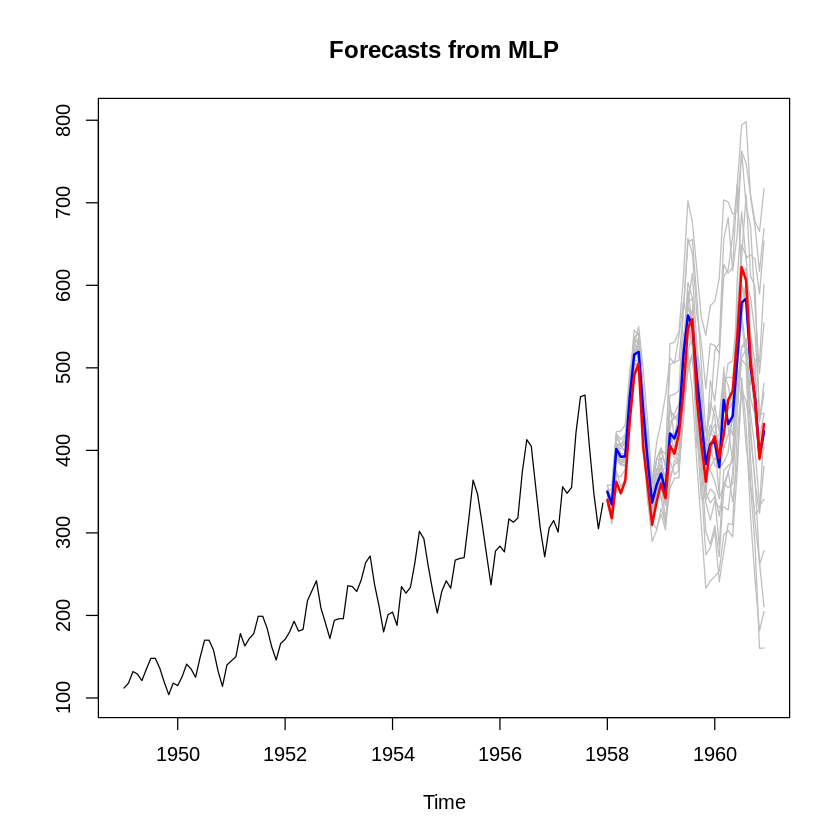

In [10]:
fit2  <- train  %>% mlp(hd.auto.type = "valid")
pred2 <- fit2 %>% forecast(h = 36)
pred2                                  # Show predictions
pred2 %>% plot()                       # Plot predictions
test   %>% lines(lwd = 2, col = "red")  # Plot testing data

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1958 343.5067 332.5482 378.4118 368.2420 383.9245 442.4009 486.3748 489.6499
1959 374.5993 367.3055 406.9804 394.7487 413.6097 468.9964 513.4305 517.2080
1960 406.3117 401.8025 437.5477 423.9678 443.4761 497.6474 542.6638 546.9427
          Sep      Oct      Nov      Dec
1958 434.9188 377.9597 334.6749 367.8927
1959 466.0232 409.5753 366.8594 399.7800
1960 496.8600 441.1060 399.3470 431.4494

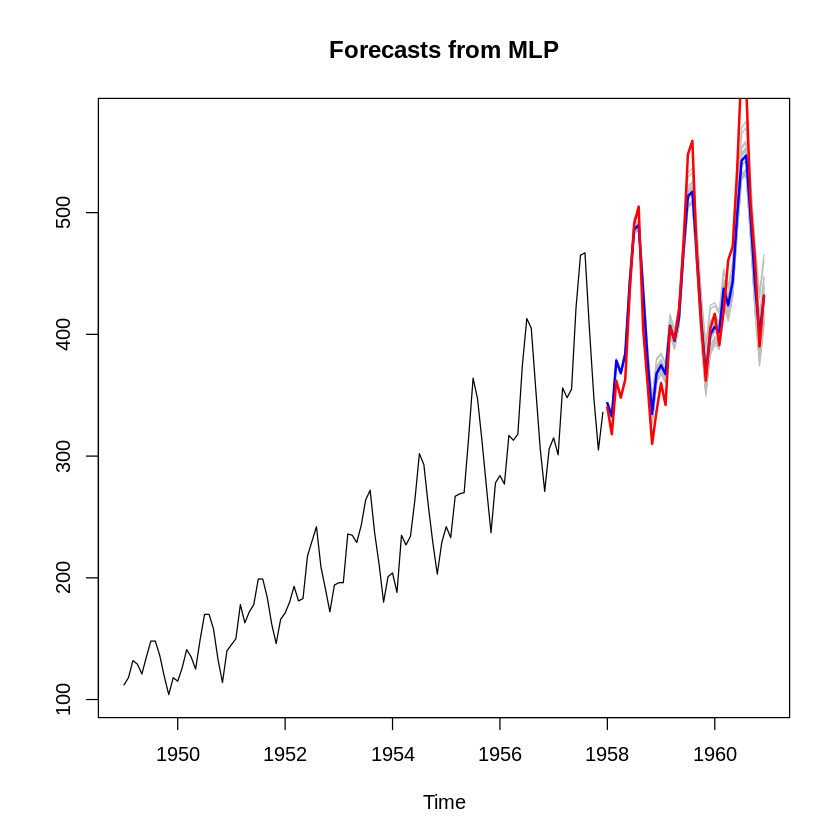

In [11]:
fit3  <- train  %>% mlp(hd.auto.type = "cv")
pred3 <- fit3 %>% forecast(h = 36)
pred3                                  # Show predictions
pred3 %>% plot()                       # Plot predictions
test   %>% lines(lwd = 2, col = "red")  # Plot testing data
